In [1]:
import pandas as pd

# Data Loading

We have to copy & paste the `load_adult_data` function from the 1st notebook.

In [2]:
def load_adult_data(data_file='../data/adult_data.csv'):
    COLUMN_NAMES = (
        'age',
        'workclass',
        'fnlwgt',
        'education',
        'education_num',
        'marital_status',
        'occupation',
        'relationship',
        'race',
        'sex',
        'capital_gain',
        'capital_loss',
        'hours_per_week',
        'native_country',
        'income',
    )
    
    return pd.read_csv(
        data_file,
        names=COLUMN_NAMES,
        skipinitialspace=True
    )

In [3]:
adult_df = load_adult_data()

# Preprocessing

We have to copy & paste the functions from the 2nd notebook.

In [4]:
def add_age_group(adult_df):
    age_group = pd.cut(
        adult_df['age'],
        bins=range(10, 101, 10),
        right=False,
        labels=[f'{age_start}~{age_start + 9}'
                for age_start in range(10, 100, 10)]
    )
    
    return adult_df.assign(age_group=age_group)

In [5]:
def change_education_type_to_category(adult_df):
    education_order = (
        adult_df
        .groupby('education')['education_num']
        .unique()
        .sort_values()
        .index
    )
    
    return adult_df.astype({
        "education": pd.CategoricalDtype(categories=education_order,
                                         ordered=True),
        "education_num": pd.CategoricalDtype(ordered=True),
    })

In [6]:
adult_df = (  # We can easily add other preprocessing in this way
    adult_df
    .pipe(add_age_group)
    .pipe(change_education_type_to_category)
)

# Equivalent to
# adult_df = add_age_group(adult_df)
# adult_df = change_education_type_to_category(adult_df)

# EDA (Exploratory Data Analysis)

![EDA](../image/eda.png)

Refer to [this GitHub repo](https://github.com/sesise0307/pydata2021-eda) for a detailed tutorial.

In [7]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.rcParams['figure.figsize'] = 10, 5  # Set a default figure size
sns.set_style('whitegrid')  # Set a default figure style

In [9]:
numeric_columns = adult_df.select_dtypes(include='number').columns
numeric_columns

Index(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'], dtype='object')

In [10]:
string_columns = adult_df.select_dtypes(exclude='number').columns
string_columns

Index(['workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'native_country', 'income',
       'age_group'],
      dtype='object')

## Histogram / KDE / Boxplot

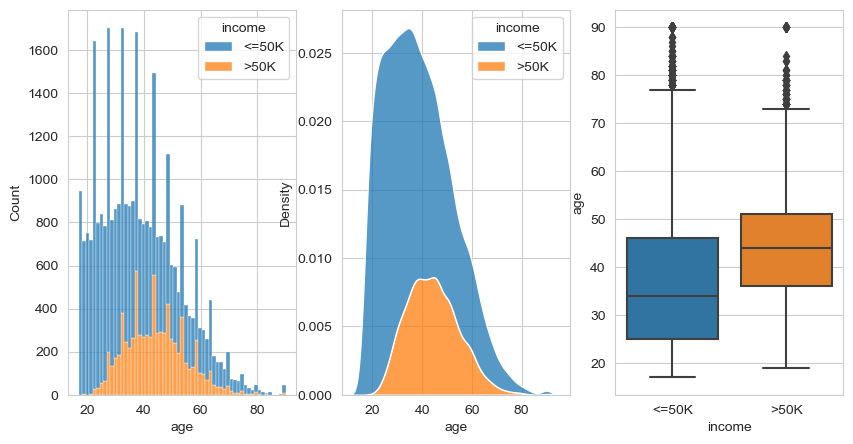

In [11]:
plt.subplot(131)
sns.histplot(data=adult_df, x='age', hue='income', multiple="stack")

plt.subplot(132)
sns.kdeplot(data=adult_df, x='age', hue='income', multiple="stack")

plt.subplot(133)
sns.boxplot(data=adult_df, y='age', x='income');

What about against 'hours_per_week'?

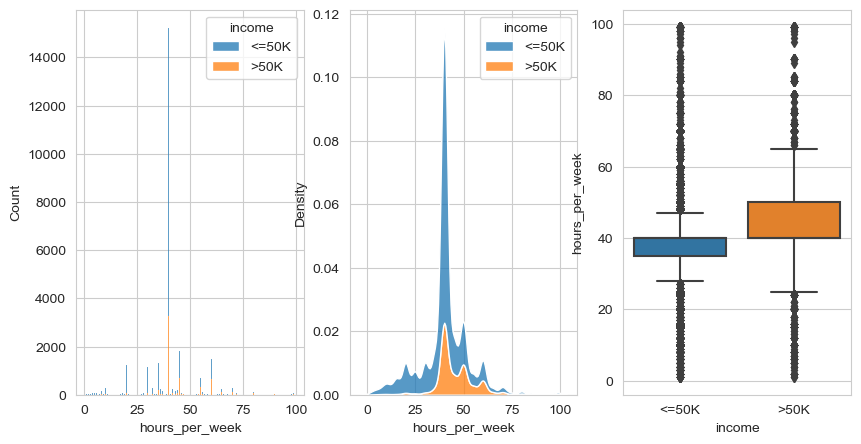

In [12]:
plt.subplot(131)
sns.histplot(data=adult_df, x='hours_per_week', hue='income', multiple="stack")

plt.subplot(132)
sns.kdeplot(data=adult_df, x='hours_per_week', hue='income', multiple="stack")

plt.subplot(133)
sns.boxplot(data=adult_df, y='hours_per_week', x='income');

What about other variables?

Let's define a function.

In [13]:
def statistical_plots(data, var, separate_by="income"):
    plt.subplot(131)
    sns.histplot(data=data, x=var, hue=separate_by, multiple="stack")

    plt.subplot(132)
    sns.kdeplot(data=data, x=var, hue=separate_by, multiple="stack")

    plt.subplot(133)
    sns.boxplot(data=data, y=var, x=separate_by)    

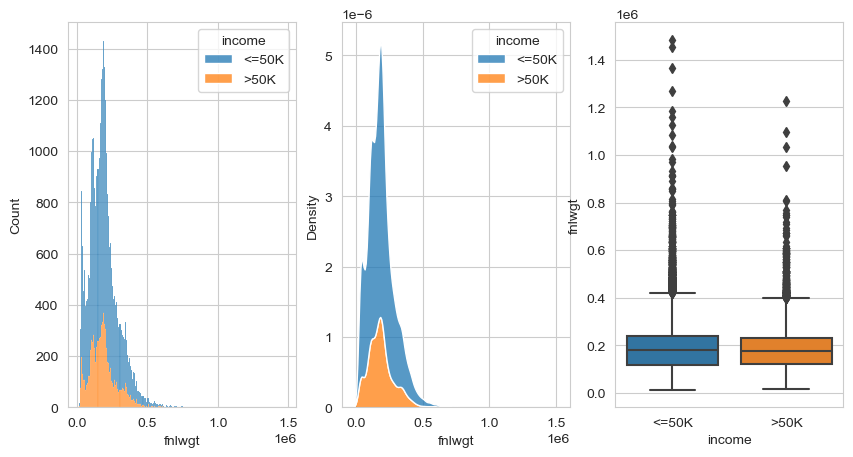

In [14]:
statistical_plots(adult_df, "fnlwgt")

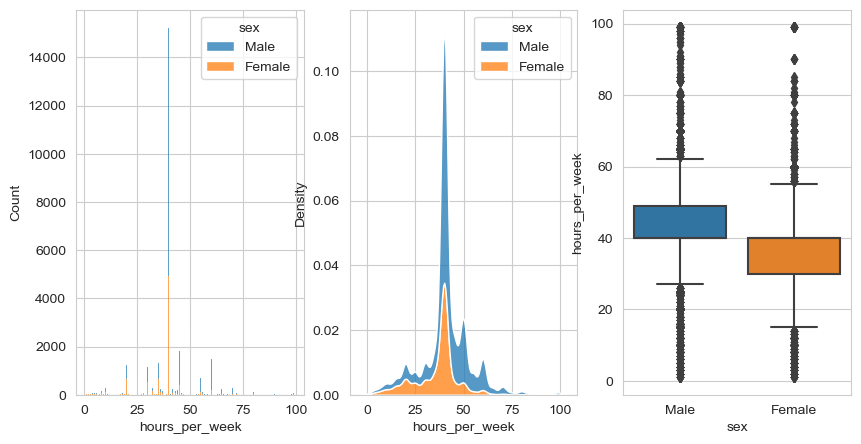

In [15]:
statistical_plots(adult_df, "hours_per_week", separate_by="sex")

In [16]:
@widgets.interact(
    var=numeric_columns,
    separate_by=string_columns,    
)
def interactice_statistical_plots(var, separate_by="income"):
    return statistical_plots(adult_df, var, separate_by)

interactive(children=(Dropdown(description='var', options=('age', 'fnlwgt', 'capital_gain', 'capital_loss', 'h…

## Count Heatmap

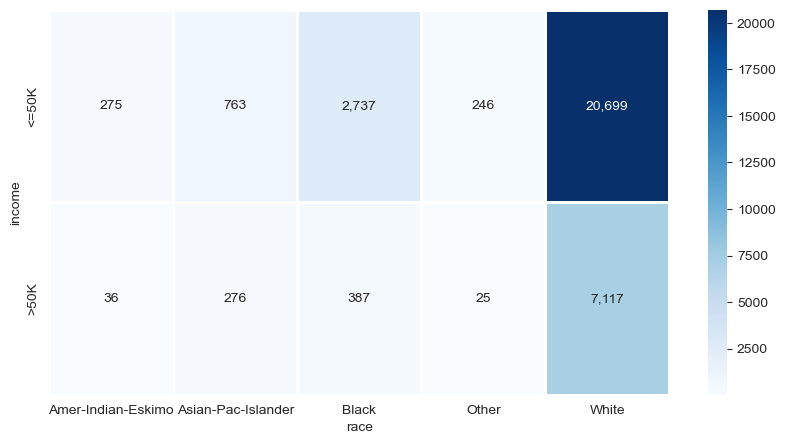

In [17]:
sns.heatmap(
    adult_df.groupby("income")[["race"]].value_counts().unstack(),
    cmap="Blues",
    annot=True,
    linewidths=1,
    fmt=",d"
);

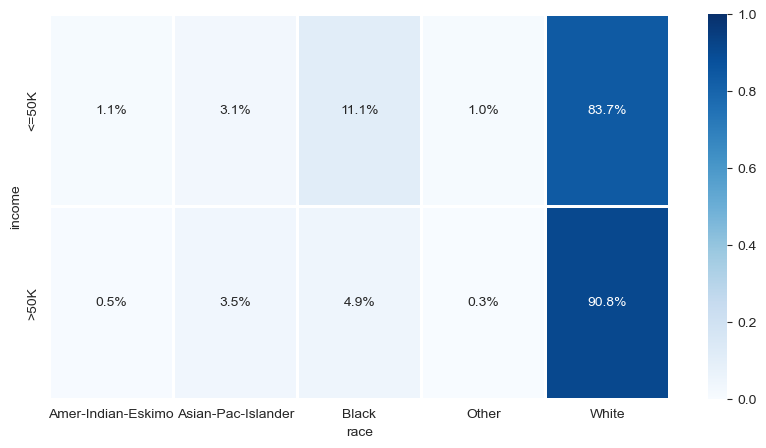

In [18]:
sns.heatmap(
    adult_df.groupby("income")[["race"]].value_counts(normalize=True).unstack(),
    cmap='Blues',
    annot=True,
    linewidths=1,
    vmin=0.0,
    vmax=1.0,
    fmt='.1%'
);

In [19]:
def normalized_count_heatmap(data, var, separate_by="income"):
    sns.heatmap(
        adult_df.groupby(separate_by)[[var]].value_counts(normalize=True).unstack(),
        cmap='Blues',
        annot=True,
        linewidths=1,
        vmin=0.0,
        vmax=1.0,
        fmt='.1%'
    )

In [20]:
@widgets.interact(
    var=string_columns,
    separate_by=string_columns,    
)
def wrapper(var, separate_by="income"):
    return normalized_count_heatmap(adult_df, var, separate_by)

interactive(children=(Dropdown(description='var', options=('workclass', 'education', 'education_num', 'marital…